# Loading, reshaping, visualizing data using pycroscopy
### Suhas Somnath, Chris R. Smith and Stephen Jesse
The Center for Nanophase Materials Science and The Institute for Functional Imaging for Materials <br>
Oak Ridge National Laboratory<br>
8/01/2017

Here, we will demonstrate how to load, reshape, and visualize multidimensional imaging datasets. For this example, we will load a three dimensional Band Excitation imaging dataset acquired from an atomic force microscope. 

In [1]:
# Ensure python 3 compatibility
from __future__ import division, print_function, absolute_import

# Import necessary libraries:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import display
import ipywidgets as widgets
import pycroscopy as px

# set up notebook to show plots within the notebook
% matplotlib inline

## Load pycroscopy compatible file

For simplicity we will use a dataset that has already been transalated form its original data format into a pycroscopy compatible hierarchical data format (HDF5 or H5) file

#### HDF5 or H5 files:
* are like smart containers that can store matrices with data, folders to organize these datasets, images, metadata like experimental parameters, links or shortcuts to datasets, etc.
* are readily compatible with high-performance computing facilities
* scale very efficiently from few kilobytes to several terabytes
* can be read and modified using any language including Python, Matlab, C/C++, Java, Fortran, Igor Pro, etc.

Python uses the h5py libaray to read, write, and access HDF5 files

In [3]:
# Select a file to work on:
h5_path = px.io_utils.uiGetFile('*.h5', 'pycroscopy formatted Ptychography dataset')
print('Working on:\n' + h5_path)

# Open the file in read-only mode
h5_file = h5py.File(h5_path, mode='r')

# Here, h5_file is an active handle to the open file

Working on:
/Users/syz/Dropbox (ORNL)/MM_Workshop/Jupyter_Notebooks/General_Pycroscopy/BELine_0004.h5


## Inspect the contents of this h5 data file
The file contents are stored in a tree structure, just like files on a contemporary computer. The file contains datagroups (similar to file folders) and datasets (similar to spreadsheets). 

There are several datasets in the file and these store:
* the actual measurement collected from the experiment, 
* spatial location on the sample where each measurement was collected,
* information to support and explain the spectral data collected at each location
* Since pycroscopy stores results from processing and analyses performed on the data in the same file, these datasets and datagroups are present as well
* any other relevant ancillary information 

In [4]:
print('Datasets and datagroups within the file:\n------------------------------------')
px.hdf_utils.print_tree(h5_file)

Datasets and datagroups within the file:
------------------------------------
/
Measurement_000
Measurement_000/Channel_000
Measurement_000/Channel_000/Bin_FFT
Measurement_000/Channel_000/Bin_Frequencies
Measurement_000/Channel_000/Bin_Indices
Measurement_000/Channel_000/Bin_Step
Measurement_000/Channel_000/Bin_Wfm_Type
Measurement_000/Channel_000/Excitation_Waveform
Measurement_000/Channel_000/Noise_Floor
Measurement_000/Channel_000/Position_Indices
Measurement_000/Channel_000/Position_Values
Measurement_000/Channel_000/Raw_Data
Measurement_000/Channel_000/Raw_Data-SHO_Fit_000
Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Fit
Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Guess
Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Spectroscopic_Indices
Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Spectroscopic_Values
Measurement_000/Channel_000/Spatially_Averaged_Plot_Group_000
Measurement_000/Channel_000/Spatially_Averaged_Plot_Group_000/Bin_Frequencies
Measurement_000/Channel_00

#### Accessing datasests and datagroups

Datasets and datagroups can be accessed by specifying the path, just like a webpage or a file in a directory

In [5]:
print('Datagroup corresponding to a channel of information:')
print(h5_file['/Measurement_000/Channel_000/'])

print('\nDataset containing the raw data collected from the microscope:')
print(h5_file['/Measurement_000/Channel_000/Raw_Data'])

Datagroup corresponding to a channel of information:
<HDF5 group "/Measurement_000/Channel_000" (16 members)>

Dataset containing the raw data collected from the microscope:
<HDF5 dataset "Raw_Data": shape (16384, 119), type "<c8">


The output above shows that the "Raw_Data" dataset is a two dimensional dataset, and has complex value (a +bi) entries at each element in the 2D matrix.

This dataset is contained in a datagroup called "Channel_000" which itself is contained in a datagroup called "Measurement_000"

The datagroup "Channel_000" contains several "members", where these members could be datasets like "Raw_Data" or datagroups like "Channel_000"

### Attributes
HDF5 datasets and datagroups can also store metadata such as experimental parameters. These metadata can be text, numbers, small lists of numbers or text etc. These metadata can be very important for understanding the datasets and guide the analysis routines

In [6]:
print('\nMetadata or attributes in a datagroup\n------------------------------------')
for key in h5_file['/Measurement_000'].attrs:
    print('{} : {}'.format(key, px.hdf_utils.get_attr(h5_file['/Measurement_000'], key)))


Metadata or attributes in a datagroup
------------------------------------
IO_Analog_Input_4 : off
BE_amplitude_[V] : 4
IO_Analog_Input_3 : off
IO_rate_[Hz] : 4000000
IO_Analog_Input_1 : +/- 1V, FFT
grid_total_time_[h;m;s] : 10
File_file_name : BELine
BE_points_per_BE_wave : 0
BE_center_frequency_[Hz] : 365000
grid_contact_set_point_[V] : 1
BE_band_edge_trim : 0.13177
BE_repeats : 4
grid_nap_mode : nap mode off
IO_AO_range_[V] : +/- 10
data_type : BELineData
BE_signal_type : chirp-sinc hybrid
num_UDVS_steps : 1
grid_num_rows : 128
BE_auto_smoothing : auto smoothing on
BE_bins_per_band : 0
BE_band_smoothing_[Hz] : 2980
IO_DAQ_platform : NI 5412/5122
num_bins : 119
grid_lift_height_[m] : 5e-08
grid_scan_time_/_line_[s] : 1
File_date_and_time : 06-Feb-2015 10:10:36
IO_Analog_Input_2 : +/- 10V, mean
File_file_suffix : 4
BE_band_width_[Hz] : 80000
BE_actual_scan_time_[s] : 0.004
BE_time/pixel_[s] : 0.004
IO_AO_amplifier : 1
grid_time_remaining_[h;m;s] : 10
num_pix : 16384
grid_num_cols : 1

In the case of the spectral dataset under investigation, a spectra with a single peak was collected at each spatial location on a two dimensional grid of points. Thus, this dataset has two position dimensions and one spectroscopic dimension (spectra). 

In pycroscopy, all spatial dimensions are collapsed to a single dimension and similarly, all spectroscopic dimensions are also collapsed to a single dimension. Thus, the data is stored as a two-dimensional (N x P) matrix with N spatial locations each with P spectroscopic datapoints.

This general and intuitive format allows imaging data from any instrument, measurement scheme, size, or dimensionality to be represented in the same way.

Such an instrument independent data format enables a single set of anaysis and processing functions to be reused for multiple image formats or modalities. 

In [7]:
h5_chan_grp = h5_file['/Measurement_000/']
h5_main = h5_chan_grp['Channel_000/Raw_Data']

print('\nThe main dataset:\n------------------------------------')
print(h5_main)
print('Original three dimensional matrix had {} rows and {} columns \
each having {} spectral points'.format(h5_chan_grp.attrs['grid_num_rows'],
                                       h5_chan_grp.attrs['grid_num_cols'],
                                       h5_chan_grp.attrs['num_bins']))
print('Collapsing the position dimensions: ({}x{}, {}) -> ({}, {})'.format(
        h5_chan_grp.attrs['grid_num_rows'],
        h5_chan_grp.attrs['grid_num_cols'],
        h5_chan_grp.attrs['num_bins'],
        h5_chan_grp.attrs['grid_num_rows'] * h5_chan_grp.attrs['grid_num_cols'],
        h5_chan_grp.attrs['num_bins']))


The main dataset:
------------------------------------
<HDF5 dataset "Raw_Data": shape (16384, 119), type "<c8">
Original three dimensional matrix had 128 rows and 128 columns each having 119 spectral points
Collapsing the position dimensions: (128x128, 119) -> (16384, 119)


Each main dataset is always accompanied by four ancillary datasets that explain:
* the position and spectroscopic value of any given element in the dataset
* the original dimensionality of the dataset
* how to reshape the data back to its N dimensional form

In the case of the 3d dataset under investigation, the positions will be arranged as row0-col0, row0-col1.... row0-colN, row1-col0....
The spectroscopic information remains unchanged.

In [8]:
print('\nThe ancillary datasets:\n------------------------------------')
print(h5_file['/Measurement_000/Channel_000/Position_Indices'])
print(h5_file['/Measurement_000/Channel_000/Position_Values'])
print(h5_file['/Measurement_000/Channel_000/Spectroscopic_Indices'])
print(h5_file['/Measurement_000/Channel_000/Spectroscopic_Values'])

print('\nSpatial dimensions:', px.hdf_utils.get_attr(
        h5_file['/Measurement_000/Channel_000/Position_Values'], 'labels'))
print('Spectroscopic dimensions:', px.hdf_utils.get_attr(
        h5_file['/Measurement_000/Channel_000/Spectroscopic_Values'], 'labels'))


The ancillary datasets:
------------------------------------
<HDF5 dataset "Position_Indices": shape (16384, 2), type "<u4">
<HDF5 dataset "Position_Values": shape (16384, 2), type "<f8">
<HDF5 dataset "Spectroscopic_Indices": shape (1, 119), type "<i4">
<HDF5 dataset "Spectroscopic_Values": shape (1, 119), type "<f4">

Spatial dimensions: ['X' 'Y']
Spectroscopic dimensions: ['Frequency']


## Visualizing the position dimensions

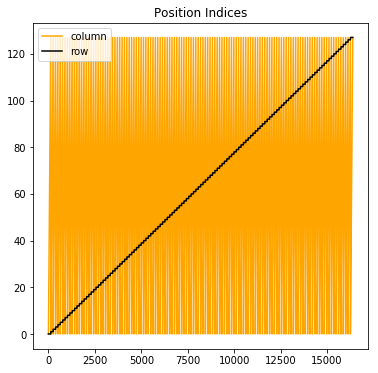

In [9]:
fig, axis = plt.subplots(figsize=(6,6))
axis.plot(h5_file['/Measurement_000/Channel_000/Position_Indices'][:, 0], 
          'orange', label='column')
axis.plot(h5_file['/Measurement_000/Channel_000/Position_Indices'][:, 1], 
          'black', label='row')
axis.legend()
axis.set_title('Position Indices');

## Inspecting the measurement at a single spatial pixel:

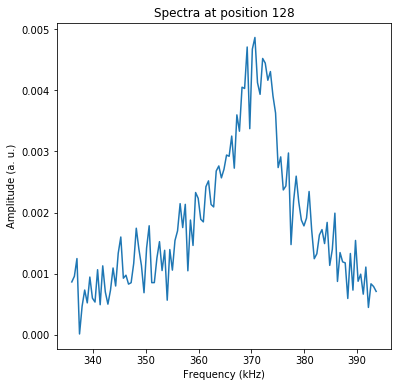

In [10]:
# specify a pixel index of interest
pixel_ind = 128

# ensuring that this index is within the bounds of the dataset
pixel_ind = max(0, min(int(pixel_ind), h5_main.shape[0]))

# Extracting the frequency vector (x-axis) to plot the spectra against
freq_vec = h5_file['/Measurement_000/Channel_000/Bin_Frequencies'][()] * 1E-3

fig, axis = plt.subplots(figsize=(6,6))
axis.plot(freq_vec, np.abs(h5_main[pixel_ind]))
axis.set_xlabel('Frequency (kHz)')
axis.set_ylabel('Amplitude (a. u.)')
axis.set_title('Spectra at position {}'.format(pixel_ind));

## Inspecting the spatial distribution of the amplitude at a single frequency

If the frequency is fixed, the spatial distribution would result in a 2D spatial map.

Note that the spatial dimensions are collapsed to a single dimension in all pycroscopy datasets. Thus, the 1D vector at the specified frequency needs to be reshaped back to a 2D map 

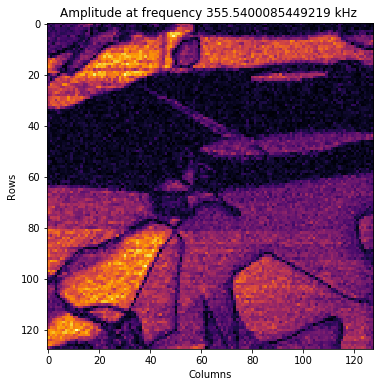

In [11]:
# specify a pixel index of interest
freq_ind = 40

# ensuring that this index is within the bounds of the dataset
freq_ind = max(0, min(int(freq_ind), h5_main.shape[1]))

# extracting the position data (1D) at the spcified frequency index
data_vec = np.abs(h5_main[:, freq_ind])

# Constructing the 2D spatial map from the 1D vector:
spat_map = np.reshape(data_vec, (h5_chan_grp.attrs['grid_num_rows'],
                                 h5_chan_grp.attrs['grid_num_cols']))

fig, axis = plt.subplots(figsize=(6,6))
axis.imshow(spat_map, cmap='inferno')
axis.set_xlabel('Columns')
axis.set_ylabel('Rows')

freq_vec = h5_file['/Measurement_000/Channel_000/Bin_Frequencies'][()] * 1E-3
axis.set_title('Amplitude at frequency {} kHz '.format(np.round(freq_vec[freq_ind], 2)));

## Reshaping data back to N dimensions

There are several utility functions in pycroscopy that make it easy to access and reshape datasets. Here we show you how to return your dat to the N dimensional form in one easy step.

While this data is a simple example and can be reshaped manually, such reshape operations become especially useful for 5,6,7 or larger dimensional datasets. 

In [13]:
ndim_data, success = px.hdf_utils.reshape_to_Ndims(h5_main)

if not success:
    print('There was a problem automatically reshaping the dataset. \
    Attempting to reshape manually')
    ndim_data = np.reshape(h5_main[()], (h5_chan_grp.attrs['grid_num_rows'],
                                         h5_chan_grp.attrs['grid_num_cols'],
                                         h5_chan_grp.attrs['num_bins']))
else:
    print('Collapsed dataset originally of shape: ', h5_main.shape)
    print('Reshaped dataset of shape: ', ndim_data.shape)

Collapsed dataset originally of shape:  (16384, 119)
Reshaped dataset of shape:  (128, 128, 119)


## The same data investigation can be performed on the N dimensional dataset:

Here we will plot the spatial maps of the sample at a given frequency again. The reshape operation is no longer necessary and we get the same spatial map again.

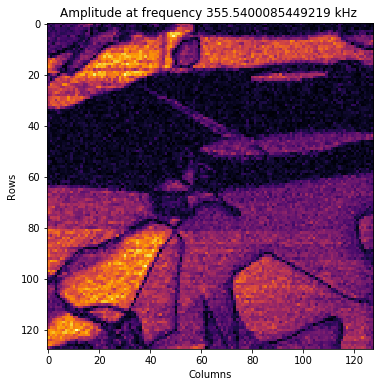

In [16]:
# specify a pixel index of interest
freq_ind = 40

# ensuring that this index is within the bounds of the dataset
freq_ind = max(0, min(int(freq_ind), h5_main.shape[1]))

# Constructing the 2D spatial map from the 3D dataset
spat_map = np.abs(ndim_data[:, :, freq_ind])

fig, axis = plt.subplots(figsize=(6,6))
axis.imshow(spat_map, cmap='inferno')
axis.set_xlabel('Columns')
axis.set_ylabel('Rows')

freq_vec = h5_file['/Measurement_000/Channel_000/Bin_Frequencies'][()] * 1E-3
axis.set_title('Amplitude at frequency {} kHz '.format(np.round(freq_vec[freq_ind], 2)));

## Closing the HDF5 file after data processing or visualization

In [18]:
h5_file.close()